# IMPORTS AND INSTALL

In [ ]:
!pip install --upgrade -q rdkit py3Dmol #

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.9 MB/s eta 0:00:00


In [ ]:
# rdkit library
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, AllChem

# 3Dmodel
import py3Dmol

# Standard libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Google Colab libraries
from google.colab import drive, files

# scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Mount drive and see data files

In [ ]:
drive.mount(
    "/content/drive"
    , force_remount=True
    )
# Our Directory
main_directory_path = "./drive/MyDrive/Group14/Code/Dataset/"

Mounted at /content/drive


In [ ]:
dataset_ex = ""
datasets = [f for f in os.listdir(main_directory_path) if f.endswith(".csv") and f not in dataset_ex]
print(len(datasets))
print(datasets)

4
['smiles_descriptors_binary_multi.csv', 'smiles_descriptors_processed_minmax_binary_multi.csv', 'smiles_descriptors_fingerprints_fused_binary_multi.csv', 'smiles_fingerprints_binary_multi.csv']


In [ ]:
for dataset in datasets:
  df = pd.read_csv(main_directory_path + dataset)
  print(dataset)
  print(len(df.columns))
  print(df.columns)
  print("--------------------------------------")

smiles_descriptors_binary_multi.csv
215
Index(['SMILES', 'SENTENCE', 'binary', 'multi', 'MaxAbsEStateIndex',
       'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'SPS.1'],
      dtype='object', length=215)
--------------------------------------
smiles_descriptors_processed_minmax_binary_multi.csv
193
Index(['SMILES', 'SENTENCE', 'binary', 'multi', 'MaxAbsEStateIndex',
       'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS',
       ...
       'fr_priamide', 'fr_pyridine', 'fr_quatN', 'fr_sulfide',
       'fr_term_acetylene', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'SPS.1'],
      dtype='object', length=193)
--------------------------------------
smiles_descriptors_fingerprints_fused_binary_multi.csv
2241
Index(['SMILES', 'SENTENCE', 'bi

### USE smiles_descriptors_fingerprints_fused_binary_multi.csv

In [ ]:
df = pd.read_csv(main_directory_path + "smiles_descriptors_fingerprints_fused_binary_multi.csv")
print(df.head())
print("\nShape: ", df.shape)

                             SMILES                   SENTENCE  binary  \
0       C/C=C/C(=O)C1CCC(C=C1C)(C)C                fruity,rose       0   
1                         COC(=O)OC      ethereal,fruity,fresh       0   
2               Cc1cc2c([nH]1)cccc2          animalic,resinous       0   
3            C1CCCCCCCC(=O)CCCCCCC1      musk,powdery,animalic       0   
4  CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C  fruity,coniferous,camphor       0   

                                               multi  MaxAbsEStateIndex  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           0.791339   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           0.658966   
2  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...           0.220539   
3  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...           0.783479   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           0.799792   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed       SPS  ...  \
0        0.791339      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Columns: 2241 entries, SMILES to Morgan_FP_999
dtypes: float64(189), int64(2049), object(3)
memory usage: 73.8+ MB


# Check number smells and if repited

In [ ]:
def check_duplicates(sentence):
    classes = sentence.split(',')
    return len(classes) != len(set(classes))

duplicates_filter = df['SENTENCE'].apply(check_duplicates)
print(len(df[duplicates_filter]))

0


In [ ]:
all_smells = df['SENTENCE'].str.split(',').sum()
unique_smells = np.unique(all_smells)
print(len(unique_smells))
unique_smells

109


array(['alcoholic', 'aldehydic', 'alliaceous', 'almond', 'ambergris',
       'ambery', 'ambrette', 'ammoniac', 'animalic', 'anisic', 'apple',
       'balsamic', 'banana', 'berry', 'blackcurrant', 'blueberry', 'body',
       'bread', 'burnt', 'butter', 'cacao', 'camphor', 'caramellic',
       'cedar', 'cheese', 'chemical', 'cherry', 'cinnamon', 'citrus',
       'clean', 'clove', 'coconut', 'coffee', 'cognac', 'coniferous',
       'cooked', 'cooling', 'cucumber', 'dairy', 'dry', 'earthy', 'ester',
       'ethereal', 'fatty', 'fennel', 'fermented', 'floral', 'fresh',
       'fruity', 'geranium', 'gourmand', 'grape', 'grapefruit', 'grass',
       'green', 'herbal', 'honey', 'hyacinth', 'jasmin', 'lactonic',
       'leaf', 'leather', 'lemon', 'lily', 'liquor', 'meat', 'medicinal',
       'melon', 'metallic', 'mint', 'mushroom', 'musk', 'musty', 'nut',
       'odorless', 'oily', 'orange', 'overripe', 'pear', 'pepper',
       'phenolic', 'plastic', 'plum', 'powdery', 'pungent', 'rancid',
    

In [ ]:
df['SMILES'].nunique()

4316

# SMELLS from papers

- **2017, Predicting human olfactory perception from chemical
features of odor molecule: 19 Smells**
  - fruit, fish, garlic, spices, cold, sour, burnt, acid, warm, musky, sweaty, bakery, sweet, urinous, decayed, wood, grass, flower, chemical.

- **2023, Principal odor map unifies diverse tasks in olfactory perception: graph 55**
  - Garlic, Meaty, Fruity, Camphoreous, Fishy, Sulfurous, Pine, Cheesy, Apple, Cooling, Roasted, Sour, Mint, Sweet, Floral, Alcoholic, Berry, Nutty, Powdery, Smoky, Tropical, Dairy, Woody, Peach, Spicy, Green, Honey, Rose, Herbal, Coffee, Tomato, Caramellic, Rummy, Earthy, Vanilla, Cucumber, Winey, Medicinal, Citrus, Animal, Metallic, Orange, Fatty, Lemon, Musty, Sharp, Jasmine, Waxy, Coconut, Grassy, Buttery, Fermented, Ozone, Hay, Musk


- **2022, Liang Shang et al. “Artificial intelligencebased gas chromatography-olfactometry for sensory evaluation of key compounds in food ingredients: 20 smells (clusters)**
  - Shang, L., Liu, C., Chen, B., Tang, F., Liu, L., & Hayashi, K. (2021). Machine-learning-based olfactometry: Odor descriptor clustering based on bayesian embedding model and its prediction from molecular graphic features. Submitted:
  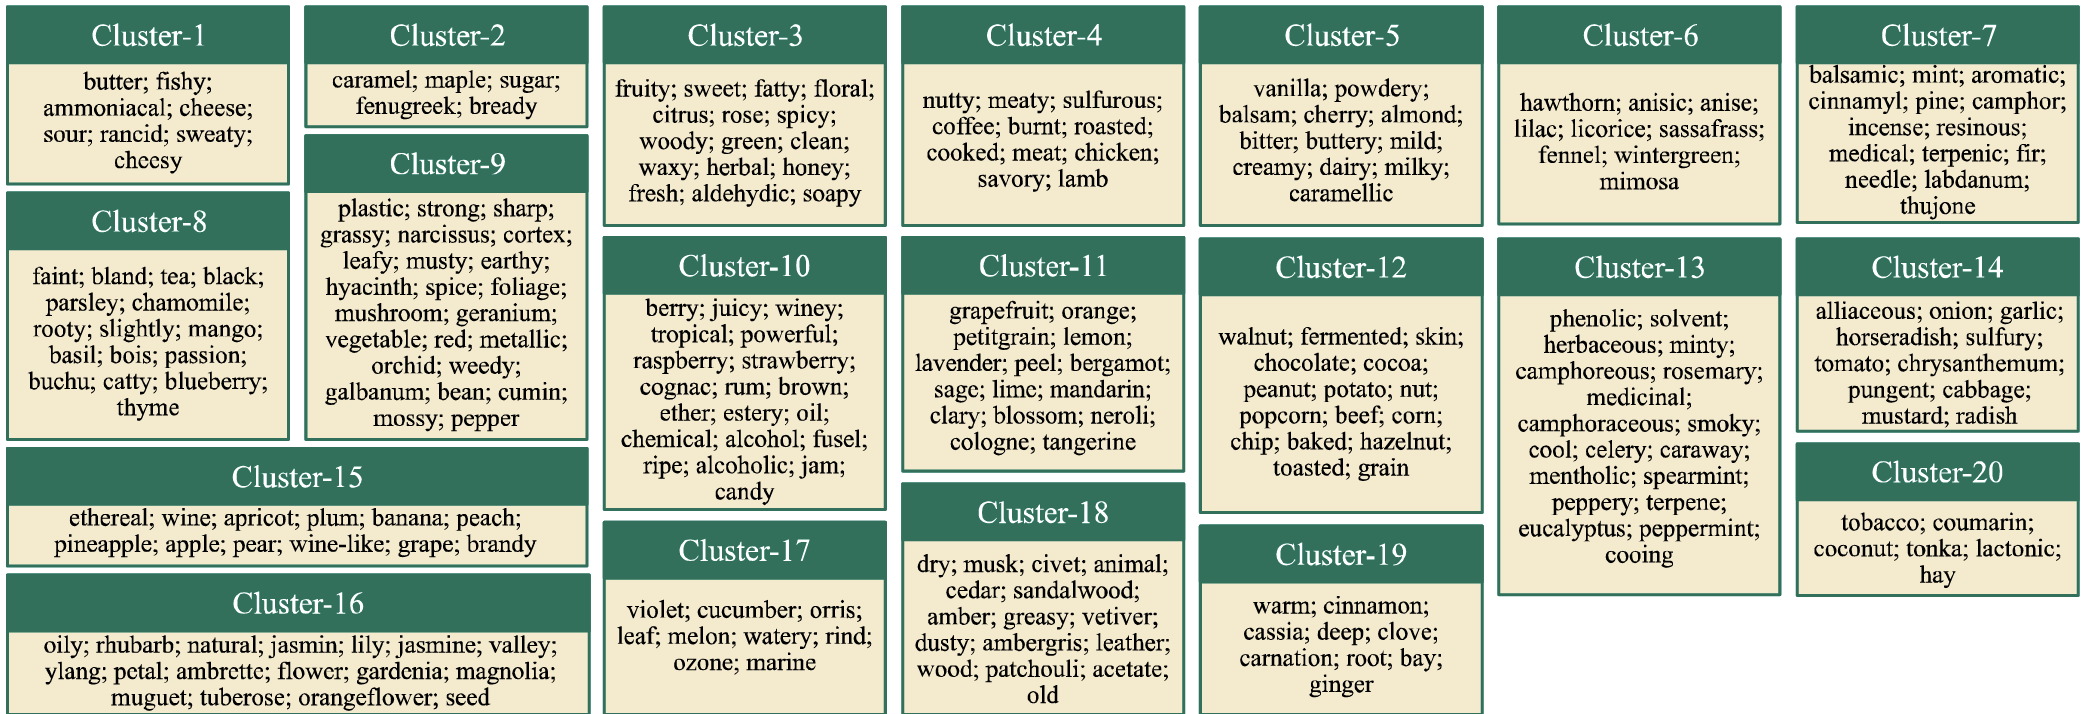

- **2020, Rinu Chacko et al. “Data based predictive models for odor perception”: 20 smells**
  - Sweet, chemical, muky, sour, edible, acid, spices, fruit, flower, burnt, warm, decayed, ammonia/urinous, sweat, bakery, cold, grass, garlic, wood, fish




# GROUPINGS

## CLUSTERING (2022 Liang Shang)

In [ ]:
cluster = {}
cluster['clust_1'] = ['butter', 'fishy', 'seafood', 'ammoniac', 'ammoniacal', 'cheese', 'sour', 'rancid', 'sweaty', 'cheesy', 'body']
cluster['clust_2'] = ['caramel', 'maple', 'sugar', 'fenugreek', 'bread', 'bready']
cluster['clust_3'] = ['fruity', 'sweet', 'fatty', 'floral', 'citrus', 'rose', 'spicy', 'woody', 'green', 'clean', 'waxy', 'herbal', 'honey', 'fresh', 'aldehydic', 'soapy', 'blackcurrant', 'pear', 'syrup']
cluster['clust_4'] = ['mutty', 'meaty', 'sulfurous', 'coffee', 'burnt', 'roasted', 'cooked', 'meat', 'chicken', 'savory', 'lamb']
cluster['clust_5'] = ['vanilla', 'powdery', 'balsam', 'cherry', 'almond', 'bitter', 'buttery', 'mild', 'creamy', 'dairy', 'milky', 'caramellic', 'gourmand']
cluster['clust_6'] = ['hawthorn', 'anisic', 'anise', 'lilac', 'licorice', 'sassafrass', 'fennel', 'wintergreen', 'mimosa']
cluster['clust_7'] = ['balsamic', 'mint', 'aromatic', 'cinnamyl', 'pine', 'coniferous', 'camphor', 'incense', 'resinous', 'medical', 'terpenic', 'fir', 'needle', 'labdanum', 'thujone']
cluster['clust_8'] = ['faint', 'bland', 'tea', 'black', 'parsley', 'chamomile', 'rooty', 'slightly', 'mango', 'basil', 'bois', 'passion', 'buchu', 'catty', 'blueberry', 'thyme']
cluster['clust_9'] = ['plastic', 'strong', 'sharp', 'grass', 'grassy', 'narcissus', 'cortex', 'leafy', 'musty', 'earthy', 'hyacinth', 'spice', 'foliage', 'mushroom', 'geranium', 'vegetable', 'red', 'metallic', 'orchid', 'weedy', 'galbanum', 'bean', 'cumin', 'mossy', 'pepper']
cluster['clust_10'] = ['berry', 'juicy', 'winey', 'tropical', 'tropicalfruit', 'powerful', 'raspberry', 'strawberry', 'cognac', 'rum', 'brown', 'ether', 'ester', 'estery', 'oil', 'chemical', 'liquor', 'alcohol', 'fusel', 'overripe', 'ripe', 'alcoholic', 'jam', 'candy']
cluster['clust_11'] = ['grapefruit', 'orange', 'petitgrain', 'lemon', 'lavender', 'peel', 'bergamot', 'sage', 'lime', 'mandarin', 'clary', 'blossom', 'neroli', 'cologne', 'tangerine']
cluster['clust_12'] = ['walnut', 'fermented', 'skin', 'chocolate', 'cacao', 'cocoa', 'peanut', 'potato', 'nut', 'popcorn', 'beef', 'corn', 'chip', 'baked', 'hazelnut', 'toasted', 'grain']
cluster['clust_13'] = ['phenolic', 'solvent', 'herbaceous', 'minty', 'camphoreous', 'rosemary', 'medicinal', 'camphoraceous', 'cedar', 'smoky', 'cool', 'cooling', 'celery', 'caraway', 'mentholic', 'spearmint', 'peppery', 'terpene', 'eucalyptus', 'peppermint', 'cooing']
cluster['clust_14'] = ['alliaceous', 'onion', 'garlic', 'horseradish', 'sulfuric', 'sulfury', 'tomato', 'chrysantheum', 'pungent', 'cabbage', 'mustard', 'radish']
cluster['clust_15'] = ['ethereal', 'wine', 'apricot', 'plum', 'banana', 'peach', 'pineapple', 'apple', 'wine-like', 'grape', 'brandy']
cluster['clust_16'] = ['oily', 'rhubarb', 'natural', 'jasmin', 'lily', 'jasmine', 'valley', 'ylang', 'petal', 'ambrette', 'flower', 'gardenia', 'magnolia', 'muguet', 'tuberose', 'orangeflower', 'violetflower', 'whiteflower', 'seed']
cluster['clust_17'] = ['violet', 'cucumber', 'orris', 'leaf', 'melon', 'watery', 'rind', 'ozone', 'marine']
cluster['clust_18'] = ['dry', 'musk', 'civet', 'animal', 'animalic', 'ceder', 'sandalwood', 'amber', 'ambery', 'greasy', 'vetiver', 'dusty', 'ambergris', 'leather', 'wood', 'patchouli', 'acetate', 'old']
cluster['clust_19'] = ['warm', 'cinnamon', 'cassia', 'deep', 'clove', 'carnation', 'root', 'bay', 'ginger']
cluster['clust_20'] = ['tobacco', 'coumarin', 'coconut', 'tonka', 'lactonic', 'hay']
cluster['clust_21'] = ['odorless'] # added odorless as its own cluster (can be ommited)

In [ ]:
all_smells = df['SENTENCE'].str.split(',').sum()
all_smells = np.unique(all_smells)

# check if all smells represented
all_cluster_smells = [smell for smells in cluster.values() for smell in smells]
all_present = all(smell in all_cluster_smells for smell in all_smells)
print("All smells present:", all_present)

# not present smells
not_present_smells = [smell for smell in all_smells if smell not in all_cluster_smells]
print(not_present_smells)

# keep smells in clusters that were present in our data (since there is a lot of smells not needed)
filtered_cluster = {key: [smell for smell in smells if smell in all_smells] for key, smells in cluster.items()}
print(filtered_cluster)

All smells present: True
[]
{'clust_1': ['butter', 'seafood', 'ammoniac', 'cheese', 'sour', 'rancid', 'body'], 'clust_2': ['bread'], 'clust_3': ['fruity', 'sweet', 'fatty', 'floral', 'citrus', 'rose', 'spicy', 'woody', 'green', 'clean', 'waxy', 'herbal', 'honey', 'fresh', 'aldehydic', 'blackcurrant', 'pear', 'syrup'], 'clust_4': ['coffee', 'burnt', 'roasted', 'cooked', 'meat'], 'clust_5': ['vanilla', 'powdery', 'cherry', 'almond', 'dairy', 'caramellic', 'gourmand'], 'clust_6': ['anisic', 'fennel'], 'clust_7': ['balsamic', 'mint', 'coniferous', 'camphor', 'resinous', 'terpenic'], 'clust_8': ['blueberry'], 'clust_9': ['plastic', 'sharp', 'grass', 'musty', 'earthy', 'hyacinth', 'mushroom', 'geranium', 'vegetable', 'metallic', 'pepper'], 'clust_10': ['berry', 'tropicalfruit', 'cognac', 'ester', 'chemical', 'liquor', 'overripe', 'ripe', 'alcoholic'], 'clust_11': ['grapefruit', 'orange', 'lemon'], 'clust_12': ['fermented', 'cacao', 'nut'], 'clust_13': ['phenolic', 'medicinal', 'cedar', 'smok

In [ ]:
# Transform SENTENCE into a list of smells
df['List_Smells'] = df['SENTENCE'].str.split(',')

# function to map smells to clusters and count times per cluster --> define only 1 final cluster depending on count
def find_associated_clusters(instance):
    associated_clusters = {}
    for key, smells in cluster.items():
        count = sum(smell in instance for smell in smells)
        if count > 0:
            associated_clusters[key] = count

    final_cluster = max(associated_clusters, key=associated_clusters.get) if associated_clusters else None
    return associated_clusters, final_cluster

# map each smell to a cluster (keep only 1 instance per cluster)
def find_clusters(instance):
    associated_clusters = [key for key, smells in cluster.items() if any(smell in instance for smell in smells)]
    return associated_clusters

df['Associated_Clusters'] = df['List_Smells'].apply(find_clusters)
df[['Associated_Clusters_Counts', 'Final_Cluster']] = df['List_Smells'].apply(find_associated_clusters).apply(pd.Series)
df[['List_Smells', 'Associated_Clusters', 'Associated_Clusters_Counts', 'Final_Cluster']]

,List_Smells,Associated_Clusters,Associated_Clusters_Counts,Final_Cluster
0,"[fruity, rose]",[clust_3],{'clust_3': 2},clust_3
1,"[ethereal, fruity, fresh]","[clust_3, clust_15]","{'clust_3': 2, 'clust_15': 1}",clust_3
2,"[animalic, resinous]","[clust_7, clust_18]","{'clust_7': 1, 'clust_18': 1}",clust_7
3,"[musk, powdery, animalic]","[clust_5, clust_18]","{'clust_5': 1, 'clust_18': 2}",clust_18
4,"[fruity, coniferous, camphor]","[clust_3, clust_7]","{'clust_3': 1, 'clust_7': 2}",clust_7
...,...,...,...,...
4311,"[citrus, floral]",[clust_3],{'clust_3': 2},clust_3
4312,"[watery, earthy]","[clust_9, clust_17]","{'clust_9': 1, 'clust_17': 1}",clust_9
4313,"[ethereal, sweet]","[clust_3, clust_15]","{'clust_3': 1, 'clust_15': 1}",clust_3
4314,[nut],[clust_12],{'clust_12': 1},clust_12


In [ ]:
new_smells = np.unique(df['Associated_Clusters'].sum())
print(len(new_smells))
print(new_smells)

21
['clust_1' 'clust_10' 'clust_11' 'clust_12' 'clust_13' 'clust_14'
 'clust_15' 'clust_16' 'clust_17' 'clust_18' 'clust_19' 'clust_2'
 'clust_20' 'clust_21' 'clust_3' 'clust_4' 'clust_5' 'clust_6' 'clust_7'
 'clust_8' 'clust_9']


Use column `Associated_Clusters` as new target labels.

## 55 SMELLS (2023, Principal Odor Map)

In [ ]:
smells_to_use = "Garlic, Meaty, Fruity, Camphoreous, Fishy, Sulfurous, Pine, Cheesy, Apple, Cooling, Roasted, Sour, Mint, Sweet, Floral, Alcoholic, Berry, Nutty, Powdery, Smoky, Tropical, Dairy, Woody, Peach, Spicy, Green, Honey, Rose, Herbal, Coffee, Tomato, Caramellic, Rummy, Earthy, Vanilla, Cucumber, Winey, Medicinal, Citrus, Animal, Metallic, Orange, Fatty, Lemon, Musty, Sharp, Jasmine, Waxy, Coconut, Grassy, Buttery, Fermented, Ozone, Hay, Musk"
smells_to_use = smells_to_use.lower().split(", ")

list(set(all_smells) - set(smells_to_use))

['meat',
 'lily',
 'cooked',
 'ambrette',
 'ammoniac',
 'grapefruit',
 'cherry',
 'cheese',
 'grass',
 'overripe',
 'animalic',
 'clean',
 'body',
 'tobacco',
 'vegetable',
 'resinous',
 'cacao',
 'cinnamon',
 'rancid',
 'pungent',
 'hyacinth',
 'melon',
 'gourmand',
 'seafood',
 'wine',
 'ambergris',
 'butter',
 'watery',
 'plastic',
 'blackcurrant',
 'burnt',
 'sulfuric',
 'fennel',
 'terpenic',
 'nut',
 'phenolic',
 'cognac',
 'ambery',
 'ethereal',
 'syrup',
 'pepper',
 'blueberry',
 'leaf',
 'fresh',
 'geranium',
 'mushroom',
 'almond',
 'cedar',
 'liquor',
 'violetflower',
 'grape',
 'dry',
 'bread',
 'jasmin',
 'banana',
 'clove',
 'chemical',
 'plum',
 'ripe',
 'aldehydic',
 'camphor',
 'alliaceous',
 'oily',
 'whiteflower',
 'odorless',
 'lactonic',
 'pear',
 'anisic',
 'leather',
 'ester',
 'balsamic',
 'tropicalfruit',
 'coniferous']

In [ ]:
# mapping missing smells to the closest of the 55 smells
# according to Google and ChatGPT
smell_mapping = {
    'ester': 'fruity',
    'aldehydic': 'citrus',
    'geranium': 'rose',
    'syrup': 'sweet',
    'watery': 'cooling',
    'terpenic': 'pine',
    'plum': 'berry',
    'cherry': 'berry',
    'melon': 'tropical',
    'butter': 'buttery',
    'coniferous': 'pine',
    'rancid': 'rummy',
    'clove': 'cpicy',
    'hyacinth': 'floral',
    'clean': 'floral',
    'grass': 'green',
    'seafood': 'fishy',
    'cacao': 'roasted',
    'nut': 'nutty',
    'mushroom': 'earthy',
    'whiteflower': 'floral',
    'ammoniac': 'medicinal',
    'camphor': 'camphoreous',
    'fennel': 'herbal',
    'pepper': 'spicy',
    'ambrette': 'musk',
    'almond': 'nutty',
    'animalic': 'animal',
    'phenolic': 'medicinal',
    'wine': 'winey',
    'cooked': 'roasted',
    'ambery': 'woody',
    'leaf': 'green',
    'meat': 'meaty',
    'cognac': 'alcoholic',
    'ripe': 'fruity',
    'bread': 'roasted',
    'sulfuric': 'sulfurous',
    'blackcurrant': 'berry',
    'pungent': 'sharp',
    'ambergris': 'animal',
    'pear': 'fruity',
    'lactonic': 'dairy',
    'cinnamon': 'spicy',
    'jasmin': 'floral',
    'tobacco': 'smoky',
    'oily': 'waxy',
    'body': 'animal',
    'dry': 'woody',
    'leather': 'woody',
    'blueberry': 'berry',
    'ethereal': 'floral',
    'banana': 'tropical',
    'plastic': 'medicinal',
    'anisic': 'licorice',
    'balsamic': 'woody',
    'cheese': 'cheesy',
    'lily': 'floral',
    'vegetable': 'green',
    'gourmand': 'sweet',
    'grapefruit': 'citrus',
    'liquor': 'alcoholic',
    'fresh': 'green',
    'violetflower': 'floral',
    'cedar': 'woody',
    'resinous': 'woody',
    'overripe': 'fruity',
    'burnt': 'smoky',
    'alliaceous': 'garlic',
    'chemical': 'medicinal',
    'tropicalfruit': 'tropical',
    'grape': 'berry',
}


def replace_smells(smell_list):
    mapped_smells = [smell_mapping[smell] if smell in smell_mapping else smell for smell in smell_list]
    return mapped_smells

# Apply the function to the 'List_Smells' column
df['55_Smells'] = df['List_Smells'].apply(replace_smells)
df['55_Smells']

0                    [fruity, rose]
1           [floral, fruity, green]
2                   [animal, woody]
3           [musk, powdery, animal]
4       [fruity, pine, camphoreous]
                   ...             
4311               [citrus, floral]
4312              [cooling, earthy]
4313                [floral, sweet]
4314                        [nutty]
4315                [woody, floral]
Name: 55_Smells, Length: 4316, dtype: object

In [ ]:
new_smells = np.unique(df['55_Smells'].sum()) # some smells are not here?
print(len(new_smells))
print(new_smells)

52
['alcoholic' 'animal' 'apple' 'berry' 'buttery' 'camphoreous' 'caramellic'
 'cheesy' 'citrus' 'coconut' 'coffee' 'cooling' 'cpicy' 'cucumber' 'dairy'
 'earthy' 'fatty' 'fermented' 'fishy' 'floral' 'fruity' 'garlic' 'green'
 'herbal' 'honey' 'lemon' 'licorice' 'meaty' 'medicinal' 'metallic' 'mint'
 'musk' 'musty' 'nutty' 'odorless' 'orange' 'pine' 'powdery' 'roasted'
 'rose' 'rummy' 'sharp' 'smoky' 'sour' 'spicy' 'sulfurous' 'sweet'
 'tropical' 'vanilla' 'waxy' 'winey' 'woody']


In [ ]:
list(set(smells_to_use) - set(new_smells))

['ozone', 'grassy', 'tomato', 'jasmine', 'hay', 'peach']

Use column `55_Smells` as new target labels.

## Top 30 Smells (Own "grouping" alternative)
It is not really a grouping, just take the top 30 smells with highest counts (frequency) and ignore all other smells.

In [ ]:
all_classes = df['SENTENCE'].str.split(',').sum()
class_series = pd.Series(all_classes)
class_counts = class_series.value_counts()
top_30_smells = class_counts[:30].index.to_numpy()
top_30_smells

array(['fruity', 'floral', 'woody', 'herbal', 'green', 'fresh', 'sweet',
       'resinous', 'spicy', 'balsamic', 'rose', 'earthy', 'ethereal',
       'citrus', 'oily', 'tropicalfruit', 'mint', 'nut', 'fatty',
       'camphor', 'sulfuric', 'berry', 'waxy', 'musk', 'vegetable',
       'apple', 'meat', 'burnt', 'phenolic', 'powdery'], dtype=object)

In [ ]:
# Function to filter smells in a list
def filter_smells(smell_list):
    return [smell for smell in smell_list if smell in top_30_smells]

# Apply the function to filter smells and remove rows with empty lists
df['30_Smells_Filtered'] = df['List_Smells'].apply(filter_smells)
df_filtered_30 = df[df['30_Smells_Filtered'].apply(lambda x: bool(x))]  # Remove rows with empty lists

# Print the updated DataFrame
print(len(df_filtered_30), len(df), len(df_filtered_30)/len(df))

3864 4316 0.8952734012974977


Using the top 30 smells we still keep 90% of our data, but only with 30 possible labels instead of 109. Use `List_Smells` as target labels but using the `df_filtered_30` datafrane.

## 20 SMELLS (2020, Rinu Chacko)

In [ ]:
smells_20 = 'fruity, fishy, garlic, spicy, cooling, sour, roasted, acid, warm, musk, sweaty, bakery, sweet, urinous, decayed, woody, grass, floral, chemical'


In [ ]:
diff = list(set(all_smells) - set(smells_20))
print(len(diff))
print(diff)

109
['sharp', 'musk', 'herbal', 'ambrette', 'ammoniac', 'grapefruit', 'cheese', 'fatty', 'tobacco', 'apple', 'vegetable', 'resinous', 'cacao', 'hyacinth', 'rancid', 'pungent', 'melon', 'gourmand', 'ambergris', 'lemon', 'watery', 'blackcurrant', 'burnt', 'orange', 'fennel', 'smoky', 'terpenic', 'musty', 'cognac', 'syrup', 'geranium', 'mushroom', 'rose', 'coconut', 'spicy', 'cedar', 'liquor', 'violetflower', 'dry', 'citrus', 'jasmin', 'clove', 'powdery', 'earthy', 'banana', 'chemical', 'plum', 'camphor', 'cucumber', 'alliaceous', 'oily', 'fruity', 'whiteflower', 'odorless', 'pear', 'anisic', 'balsamic', 'dairy', 'berry', 'lily', 'cooked', 'fermented', 'waxy', 'sour', 'caramellic', 'cherry', 'vanilla', 'grass', 'overripe', 'animalic', 'coffee', 'clean', 'body', 'meat', 'sulfuric', 'cinnamon', 'woody', 'seafood', 'wine', 'alcoholic', 'butter', 'plastic', 'mint', 'nut', 'phenolic', 'ambery', 'ethereal', 'pepper', 'blueberry', 'leaf', 'fresh', 'almond', 'sweet', 'grape', 'green', 'bread', 'm

I would not use this one. The smells in the original paper are very different from the ones we have and therefore all smells need to be "classified" --> Too much human error.

# Example how to transform target into multi-label binary encoding

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

y = df['Associated_Clusters']

# Use MultiLabelBinarizer to one-hot encode the labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
print(df['Associated_Clusters'][2])
print(y[2])

['clust_7', 'clust_18']
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]


# Find rules with apriori

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
df['SENTENCE_LIST'] = df['SENTENCE'].apply(lambda x: x.split(","))
sentences = df['SENTENCE_LIST'].to_list()
print(sentences[:10])
print(len(sentences))

[['fruity', 'rose'], ['ethereal', 'fruity', 'fresh'], ['animalic', 'resinous'], ['musk', 'powdery', 'animalic'], ['fruity', 'coniferous', 'camphor'], ['tropicalfruit'], ['fruity', 'coffee'], ['woody'], ['clean', 'fresh'], ['herbal', 'honey', 'spicy']]
4316


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(sentences).transform(sentences)
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)
df_apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,alcoholic,aldehydic,alliaceous,almond,ambergris,ambery,ambrette,ammoniac,animalic,anisic,...,tobacco,tropicalfruit,vanilla,vegetable,violetflower,watery,waxy,whiteflower,wine,woody
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4312,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df_apriori, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length']>=2].sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
93,0.038230,"(fruity, floral)",2
106,0.035681,"(fruity, herbal)",2
100,0.035681,"(fresh, fruity)",2
105,0.032437,"(green, fruity)",2
98,0.030120,"(sweet, floral)",2
110,0.028730,"(sweet, fruity)",2
92,0.028035,"(fresh, floral)",2
102,0.027340,"(fresh, herbal)",2
95,0.026877,"(floral, herbal)",2
112,0.026413,"(green, herbal)",2


### Text from Kushagra Saini and Venkatnarayan Ramanathan. “Predicting odor from molecular structure: a multi-label classification approach”

The construction of the co-occurrence matrix whose heatmap is shown in Fig. 7, revealed that green and fruity labels co-occurring 518 times and sweet and fruity labels co-occurring 433 times are the top 2 frequently occurring label pairs (Table 2). That means of all the molecules having a fruity odor 25% of them also have a green odor. Conversely, 40% of all molecules having a green odor also have a fruity odor. This follows suit with the general observation with MLDs that there usually exists some label correlation.

More ...

Louvain community detection reveals the correlation between larger length label sets and it was observed that some of the groupings obtained by running the algorithm can be corroborated by common sense; for example, medicinal, phenolic, and chemical being in the same community intuitively seems right. The same is true for odor labels like fruity, apple, pear, banana, tropical fruit, melon, and grape. At the same time, some odor labels occur in communities one would not expect them to, for example, food with plastic, honey with lemon, etc. The network graph confirms that there exists some global correlation between labels. As seen in Fig. 8 the algorithm uncovered 4 clusters among a total of 109 odor labels. This approach was based on a measure called modularity, which tries to maximize the difference between the actual number of edges in a community and the expected number of edges in the community.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# IDEA FOR MULTI-LABEL:
The cardinality of our dataset (mean number of labels per sample) is 3. Do only multi-class classification and output top 3 smells with highest probability?

On the paper tho...

It is worthwhile noting that although there is a label correlation between our odor labels, we **got better model performance from binary relevance which discards these correlations as opposed to classifier chains which take them into account.**
- binary relevance for multilabel classification amounts to independently training one binary classifier for each label